<a href="https://colab.research.google.com/github/ArnavTripathi1/WOC-7.0-PROJECT/blob/main/N_Layer_Neural_Network_(Binary_Class).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Neural Network**



## **1. Loading Modules**







In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **2. Importing and Handling Data**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')            # mounting google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/nn_train.csv', delimiter = ',', nrows = 40000)       # reading train set
df1 = df.drop(columns = ['ID'])
print(df1.shape)

(40000, 1026)




`Dividing Data into Train, CV and Test Set`













In [ ]:
print('TRAIN SET')
print(df1.iloc[:32000])

print()
print()

print('CROSS VALIDATION SET')
print(df1.iloc[32000:36000])

print()
print()

print('TEST SET')
print(df1.iloc[36000:])

TRAIN SET
       Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0             81        109         91         96        107         97   
1            168        168        169        169        170        171   
2             14         20         32          6         27          6   
3             60        109        157        126         82         80   
4             63         72         86         75         93         77   
...          ...        ...        ...        ...        ...        ...   
31995        227        247        241        128         53         95   
31996         80         81         84         87         89         92   
31997          1          0          3          5          0         28   
31998        166        166        166        167        167        167   
31999         25         19         51         43         48         22   

       Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_1017  \
0            103

In [ ]:
df_train = df.iloc[:32000]
df_cv = df.iloc[32000:36000]
df_test = df.iloc[36000:]




`Arranging Train Set as an array`




In [ ]:
features_train = df_train.loc[:, 'Feature_1':'binary_label']

x_train = features_train.to_numpy()
y_train = df_train['class_label'].to_numpy()

print(f"x_train = {x_train}")
print()
print(f"y_train = {y_train}")

x_train = [[ 81 109  91 ...  78  78   0]
 [168 168 169 ...  44  44   0]
 [ 14  20  32 ...  43  41   0]
 ...
 [  1   0   3 ...   0   0   0]
 [166 166 166 ... 171 171   0]
 [ 25  19  51 ...  89  89   1]]

y_train = [5 9 5 ... 4 1 5]


`x_train Normalization`

In [ ]:
mean = np.mean(x_train, axis = 0)
std = np.std(x_train, axis = 0)

x_train = (x_train - mean) / std

print(f"Normalized x_train = {x_train}")

Normalized x_train = [[-0.50496428 -0.10820463 -0.39266929 ... -0.5586081  -0.54296581
  -1.00231518]
 [ 0.75055437  0.75525912  0.75549863 ... -1.14496919 -1.12056304
  -1.00231518]
 [-1.47185795 -1.41071774 -1.26115527 ... -1.16221511 -1.1715275
  -1.00231518]
 ...
 [-1.65946419 -1.70341731 -1.68803822 ... -1.90378942 -1.8680418
  -1.00231518]
 [ 0.72169187  0.72598916  0.71133832 ...  1.04526194  1.03693248
  -1.00231518]
 [-1.31311421 -1.42535272 -0.98147335 ... -0.36890304 -0.35609612
   0.99769017]]


## **3. Visualising the Data**

In [ ]:
Class_1 = np.sum(y_train == 1)
Class_2 = np.sum(y_train == 2)
Class_3 = np.sum(y_train == 3)
Class_4 = np.sum(y_train == 4)
Class_5 = np.sum(y_train == 5)
Class_6 = np.sum(y_train == 6)
Class_7 = np.sum(y_train == 7)
Class_8 = np.sum(y_train == 8)
Class_9 = np.sum(y_train == 9)
Class_10 = np.sum(y_train == 10)

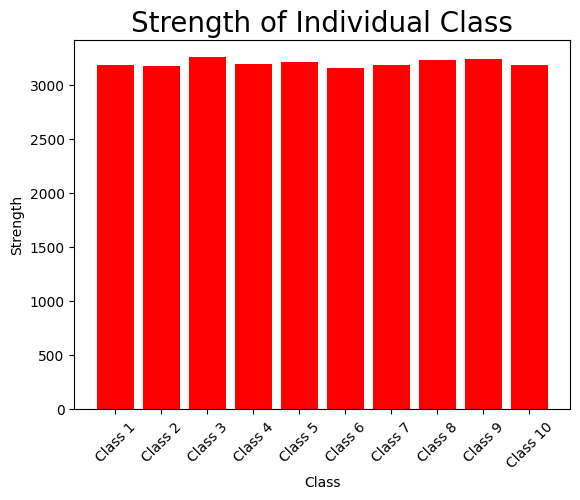

In [ ]:
Category = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9', 'Class 10']
Value = [Class_1, Class_2, Class_3, Class_4, Class_5, Class_6, Class_7, Class_8, Class_9, Class_10]

plt.bar(Category, Value, color = 'red')
plt.title('Strength of Individual Class', fontdict = {'fontsize' : 20})
plt.xlabel('Class')
plt.ylabel('Strength')

plt.xticks(rotation=45)
plt.show()

##**4. Model Initialization**

In [ ]:
m = x_train.shape[0]
n = x_train.shape[1]

## **Defining Softmax Function**

In [ ]:
def softmax(z):
  e_z = np.exp(z - np.max(z, axis=1, keepdims=True))
  return e_z / e_z.sum(axis=1, keepdims=True)

## **Defining ReLU Function**

In [ ]:
def relu(z):
  return np.maximum(0, z)

## **Forward Propogation**

In [ ]:
def forward_prop(x, w1, b1, w2, b2, w3, b3, w4, b4):

  z1 = np.matmul(x, w1) + b1
  a1 = relu(z1)

  z2 = np.matmul(a1, w2) + b2
  a2 = relu(z2)

  z3 = np.matmul(a2, w3) + b3
  a3 = relu(z3)

  z4 = np.matmul(a3, w4) + b4
  a4 = softmax(z4)

  return a1, a2, a3, a4, z1, z2, z3, z4

## **Defining Cost Function**

In [ ]:
def cost(y_true, y_pred, w1, w2, w3, w4, lambd):
    m = y_true.shape[0]
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    cross_entropy_loss = -np.sum(y_true * np.log(y_pred)) / m

    regularization = (lambd / (2 * m)) * (np.sum(np.square(w1)) + np.sum(np.square(w2)) + np.sum(np.square(w3)) + np.sum(np.square(w4)))

    return cross_entropy_loss + regularization

## **5. Backward Propogation**

`Backward Propogation`

In [ ]:
def backprop(x, y_true, w1, b1, w2, b2, w3, b3, w4, b4, a1, a2, a3, a4, z1, z2, z3, z4, learning_rate, lambd):
    m = x.shape[0]

    dz4 = a4 - y_true
    dw4 = (np.matmul(a3.T, dz4) / m) + (lambd / m) * w4
    db4 = np.sum(dz4, axis=0, keepdims=True) / m

    dz3 = np.matmul(dz4, w4.T) * (z3 > 0).astype(float)
    dw3 = (np.matmul(a2.T, dz3) / m) + (lambd / m) * w3
    db3 = np.sum(dz3, axis=0, keepdims=True) / m

    dz2 = np.matmul(dz3, w3.T) * (z2 > 0).astype(float)
    dw2 = (np.matmul(a1.T, dz2) / m) + (lambd / m) * w2
    db2 = np.sum(dz2, axis=0, keepdims=True) / m

    dz1 = np.matmul(dz2, w2.T) * (z1 > 0).astype(float)
    dw1 = (np.matmul(x.T, dz1) / m) + (lambd / m) * w1
    db1 = np.sum(dz1, axis=0, keepdims=True) / m

    return dw1, db1, dw2, db2, dw3, db3, dw4, db4

## **6. Defining Gradient Descent**

`One - Hot Encoding Labels`

In [ ]:
y_train_encoded = np.eye(10)[y_train - 1]

`Gradient Descent`

In [ ]:
def gradient_descent(x_train, y_train, w1, b1, w2, b2, w3, b3, w4, b4, alpha, lambd, num_iters):
    J_history = []

    for i in range(num_iters):

        a1, a2, a3, a4, z1, z2, z3, z4 = forward_prop(x_train, w1, b1, w2, b2, w3, b3, w4, b4)


        dw1, db1, dw2, db2, dw3, db3, dw4, db4 = backprop(x_train, y_train_encoded, w1, b1, w2, b2, w3, b3, w4, b4,
                                                           a1, a2, a3, a4, z1, z2, z3, z4, alpha, lambd)

        w1 -= alpha * dw1
        b1 -= alpha * db1
        w2 -= alpha * dw2
        b2 -= alpha * db2
        w3 -= alpha * dw3
        b3 -= alpha * db3
        w4 -= alpha * dw4
        b4 -= alpha * db4

        if i < 100000:
            J_history.append(cost(y_train_encoded, a4, w1, w2, w3, w4, lambd))

        if i % (num_iters // 10) == 0:
            print(f"Epoch {i:6}/{num_iters} : Cost {J_history[-1]:8.4f}")

    return w1, b1, w2, b2, w3, b3, w4, b4, J_history

In [ ]:
w1_int = np.random.randn(1025, 50) * 0.01
b1_int = np.zeros((1, 50))
w2_int = np.random.randn(50, 25) * 0.01
b2_int = np.zeros((1, 25))
w3_int = np.random.randn(25, 12) * 0.01
b3_int = np.zeros((1, 12))
w4_int = np.random.randn(12, 10) * 0.01
b4_int = np.zeros((1, 10))

In [ ]:
epochs = 2000
tmp_alpha = 0.1                                 # learning rate

In [ ]:
%time

w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist = gradient_descent(x_train ,y_train, w1_int, b1_int, w2_int, b2_int, w3_int, b3_int, w4_int, b4_int,
                                                                                        tmp_alpha, epochs)


print(f"TRAIN COST estimated is ={J_hist[-1] : 8.4f}")

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 10.3 µs
Epochs      0/2000 : Cost   2.3026 
Epochs    200/2000 : Cost   2.3025 
Epochs    400/2000 : Cost   2.3025 
Epochs    600/2000 : Cost   2.3025 
Epochs    800/2000 : Cost   2.3025 
Epochs   1000/2000 : Cost   2.3025 
Epochs   1200/2000 : Cost   2.3025 
Epochs   1400/2000 : Cost   2.3025 
Epochs   1600/2000 : Cost   2.3025 
Epochs   1800/2000 : Cost   2.3025 
TRAIN COST estimated is =  2.3025


`Learning Curve`

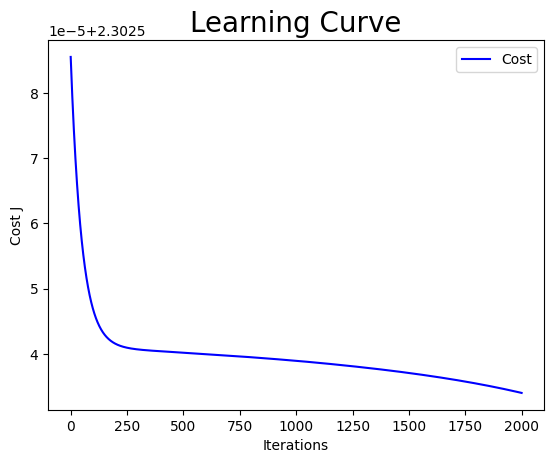

In [ ]:
plt.plot(np.arange(len(J_hist)), J_hist, 'b', label = 'Cost')
plt.title('Learning Curve', fontdict = {'fontsize' : 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')

plt.legend()

plt.show()

`Gradient Descent Continued`

In [ ]:
%time
epochs = 8000
tmp_alpha = 0.06
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist_1 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                     tmp_alpha, epochs)

print(f"TRAIN COST estimated is ={J_hist_1[-1] : 8.4f}")

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.3 µs
Epochs      0/8000 : Cost   2.3025 
Epochs    800/8000 : Cost   2.3025 
Epochs   1600/8000 : Cost   2.3025 
Epochs   2400/8000 : Cost   2.3025 
Epochs   3200/8000 : Cost   2.3023 
Epochs   4000/8000 : Cost   2.2351 
Epochs   4800/8000 : Cost   2.0003 
Epochs   5600/8000 : Cost   1.7804 
Epochs   6400/8000 : Cost   1.5840 
Epochs   7200/8000 : Cost   1.4623 
TRAIN COST estimated is =  1.3279


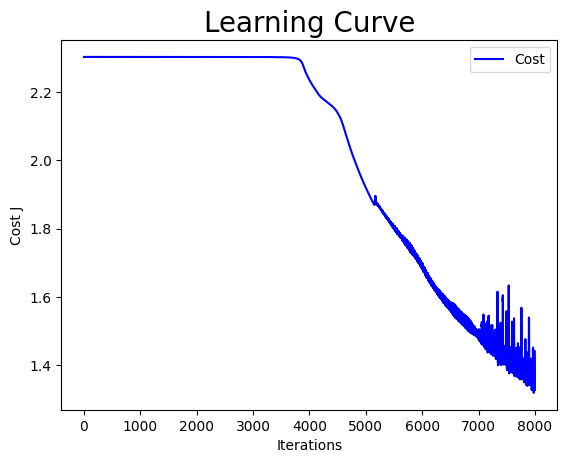

In [ ]:
plt.plot(np.arange(len(J_hist_1)), J_hist_1, 'b', label='Cost')
plt.title('Learning Curve', fontdict={'fontsize': 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.legend()
plt.show()

`Gradient Descent Continued`

In [ ]:
epochs = 5000
tmp_alpha = 0.006                                 # learning rate

In [ ]:
%time
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist_2 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                  tmp_alpha, epochs)



print(f"TRAIN COST estimated is ={J_hist_2[-1] : 8.4f}")

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 12.4 µs
Epochs      0/5000 : Cost   1.3219 
Epochs    500/5000 : Cost   1.2842 
Epochs   1000/5000 : Cost   1.2718 
Epochs   1500/5000 : Cost   1.2605 
Epochs   2000/5000 : Cost   1.2495 
Epochs   2500/5000 : Cost   1.2387 
Epochs   3000/5000 : Cost   1.2281 
Epochs   3500/5000 : Cost   1.2176 
Epochs   4000/5000 : Cost   1.2072 
Epochs   4500/5000 : Cost   1.1967 
TRAIN COST estimated is =  1.1864


`Learning Curve`

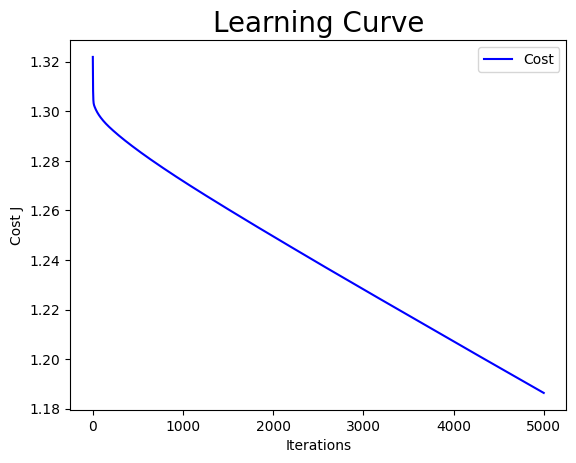

In [ ]:
plt.plot(np.arange(len(J_hist_2)), J_hist_2, 'b', label='Cost')
plt.title('Learning Curve', fontdict={'fontsize': 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.legend()
plt.show()

`Gradient Descent Continued`

In [ ]:
%time
epochs = 5000
tmp_alpha = 0.008
tmp_lambda = 0.01
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist_3 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                     tmp_alpha, tmp_lambda, epochs)

print(f"TRAIN COST estimated is ={J_hist_3[-1] : 8.4f}")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.34 µs
Epoch      0/5000 : Cost   1.1277
Epoch    500/5000 : Cost   1.0552
Epoch   1000/5000 : Cost   1.0409
Epoch   1500/5000 : Cost   1.0273
Epoch   2000/5000 : Cost   1.0140
Epoch   2500/5000 : Cost   1.0010
Epoch   3000/5000 : Cost   0.9885
Epoch   3500/5000 : Cost   0.9761
Epoch   4000/5000 : Cost   0.9710
Epoch   4500/5000 : Cost   0.9569
TRAIN COST estimated is =  0.9643


`Learning Curve`

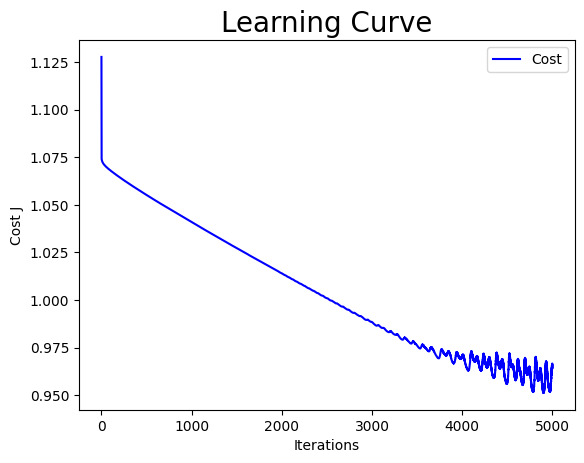

In [ ]:
plt.plot(np.arange(len(J_hist_3)), J_hist_3, 'b', label='Cost')
plt.title('Learning Curve', fontdict={'fontsize': 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.legend()
plt.show()

`Testing Different Values of lambda`

In [ ]:
epochs = 1000
tmp_alpha = 0.008                                 # learning rate
tmp_lambda = 10

In [ ]:
%time
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_test = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                  tmp_alpha, tmp_lambda, epochs)



print(f"TRAIN COST estimated is ={J_test[-1] : 8.4f}")

CPU times: user 0 ns, sys: 18 µs, total: 18 µs
Wall time: 23.1 µs
Epoch      0/1000 : Cost   0.9702
Epoch    100/1000 : Cost   0.9891
Epoch    200/1000 : Cost   0.9701
Epoch    300/1000 : Cost   0.9706
Epoch    400/1000 : Cost   0.9872
Epoch    500/1000 : Cost   0.9599
Epoch    600/1000 : Cost   0.9747
Epoch    700/1000 : Cost   0.9788
Epoch    800/1000 : Cost   0.9558
Epoch    900/1000 : Cost   0.9631
TRAIN COST estimated is =  0.9863


In [ ]:
epochs = 1000
tmp_alpha = 0.002                                 # learning rate
tmp_lambda = 20

In [ ]:
%time
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_test1 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                  tmp_alpha, tmp_lambda, epochs)



print(f"TRAIN COST estimated is ={J_test1[-1] : 8.4f}")

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 26.5 µs
Epoch      0/1000 : Cost   1.0114
Epoch    100/1000 : Cost   0.9586
Epoch    200/1000 : Cost   0.9578
Epoch    300/1000 : Cost   0.9571
Epoch    400/1000 : Cost   0.9564
Epoch    500/1000 : Cost   0.9557
Epoch    600/1000 : Cost   0.9551
Epoch    700/1000 : Cost   0.9544
Epoch    800/1000 : Cost   0.9538
Epoch    900/1000 : Cost   0.9531
TRAIN COST estimated is =  0.9525


In [ ]:
epochs = 1000
tmp_alpha = 0.002                                 # learning rate
tmp_lambda = 80

In [ ]:
%time
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_test2 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                  tmp_alpha, tmp_lambda, epochs)



print(f"TRAIN COST estimated is ={J_test2[-1] : 8.4f}")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.34 µs
Epoch      0/1000 : Cost   1.0827
Epoch    100/1000 : Cost   1.0822
Epoch    200/1000 : Cost   1.0817
Epoch    300/1000 : Cost   1.0812
Epoch    400/1000 : Cost   1.0807
Epoch    500/1000 : Cost   1.0802
Epoch    600/1000 : Cost   1.0798
Epoch    700/1000 : Cost   1.0793
Epoch    800/1000 : Cost   1.0788
Epoch    900/1000 : Cost   1.0783
TRAIN COST estimated is =  1.0779


In [ ]:
epochs = 1000
tmp_alpha = 0.002                                 # learning rate
tmp_lambda = 160

In [ ]:
%time
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_test3 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                  tmp_alpha, tmp_lambda, epochs)



print(f"TRAIN COST estimated is ={J_test3[-1] : 8.4f}")

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 19.8 µs
Epoch      0/1000 : Cost   1.2519
Epoch    100/1000 : Cost   1.2513
Epoch    200/1000 : Cost   1.2508
Epoch    300/1000 : Cost   1.2502
Epoch    400/1000 : Cost   1.2496
Epoch    500/1000 : Cost   1.2491
Epoch    600/1000 : Cost   1.2486
Epoch    700/1000 : Cost   1.2480
Epoch    800/1000 : Cost   1.2475
Epoch    900/1000 : Cost   1.2470
TRAIN COST estimated is =  1.2465


In [ ]:
epochs = 1000
tmp_alpha = 0.002                                 # learning rate
tmp_lambda = 320

In [ ]:
%time
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_test4 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                  tmp_alpha, tmp_lambda, epochs)



print(f"TRAIN COST estimated is ={J_test4[-1] : 8.4f}")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.34 µs
Epoch      0/1000 : Cost   1.5919
Epoch    100/1000 : Cost   1.5903
Epoch    200/1000 : Cost   1.5886
Epoch    300/1000 : Cost   1.5871
Epoch    400/1000 : Cost   1.5855
Epoch    500/1000 : Cost   1.5840
Epoch    600/1000 : Cost   1.5825
Epoch    700/1000 : Cost   1.5810
Epoch    800/1000 : Cost   1.5796
Epoch    900/1000 : Cost   1.5781
TRAIN COST estimated is =  1.5768


In [ ]:
epochs = 1000
tmp_alpha = 0.002                                 # learning rate
tmp_lambda = 640

In [ ]:
%time
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_test5 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                  tmp_alpha, tmp_lambda, epochs)



print(f"TRAIN COST estimated is ={J_test5[-1] : 8.4f}")

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs
Epoch      0/1000 : Cost   2.2506
Epoch    100/1000 : Cost   2.2434
Epoch    200/1000 : Cost   2.2365
Epoch    300/1000 : Cost   2.2297
Epoch    400/1000 : Cost   2.2231
Epoch    500/1000 : Cost   2.2166
Epoch    600/1000 : Cost   2.2102
Epoch    700/1000 : Cost   2.2040
Epoch    800/1000 : Cost   2.1979
Epoch    900/1000 : Cost   2.1919
TRAIN COST estimated is =  2.1861


`Gradient Descent`

In [ ]:
epochs = 10000
tmp_alpha = 0.002
tmp_lambda = 640

In [ ]:
%time
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist_4 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                  tmp_alpha, tmp_lambda, epochs)



print(f"TRAIN COST estimated is ={J_hist_4[-1] : 8.4f}")

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs
Epoch      0/10000 : Cost   2.1861
Epoch   1000/10000 : Cost   2.1330
Epoch   2000/10000 : Cost   2.0884
Epoch   3000/10000 : Cost   2.0502
Epoch   4000/10000 : Cost   2.0172
Epoch   5000/10000 : Cost   1.9885
Epoch   6000/10000 : Cost   1.9633
Epoch   7000/10000 : Cost   1.9412
Epoch   8000/10000 : Cost   1.9217
Epoch   9000/10000 : Cost   1.9043
TRAIN COST estimated is =  1.8888


`Learning Curve`

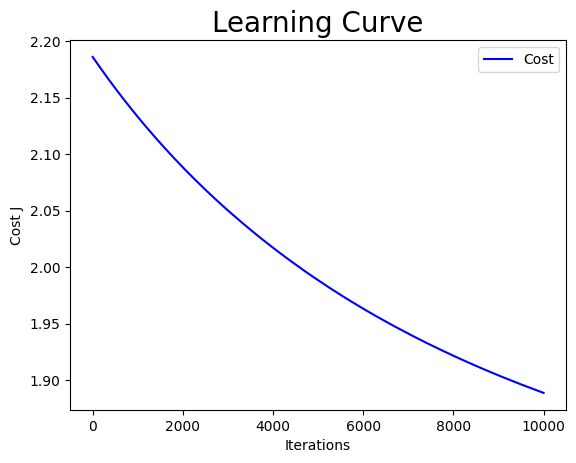

In [ ]:
plt.plot(np.arange(len(J_hist_4)), J_hist_4, 'b', label='Cost')
plt.title('Learning Curve', fontdict={'fontsize': 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.legend()
plt.show()

`Gradient Descent Continued`

In [ ]:
epochs = 1000
tmp_alpha = 0.002
tmp_lambda = 580

In [ ]:
%time
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist_5 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                  tmp_alpha, tmp_lambda, epochs)



print(f"TRAIN COST estimated is ={J_hist_5[-1] : 8.4f}")

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
Epoch      0/1000 : Cost   1.6946
Epoch    100/1000 : Cost   1.6945
Epoch    200/1000 : Cost   1.6943
Epoch    300/1000 : Cost   1.6941
Epoch    400/1000 : Cost   1.6939
Epoch    500/1000 : Cost   1.6937
Epoch    600/1000 : Cost   1.6935
Epoch    700/1000 : Cost   1.6933
Epoch    800/1000 : Cost   1.6932
Epoch    900/1000 : Cost   1.6930
TRAIN COST estimated is =  1.6928


`Learning Curve`

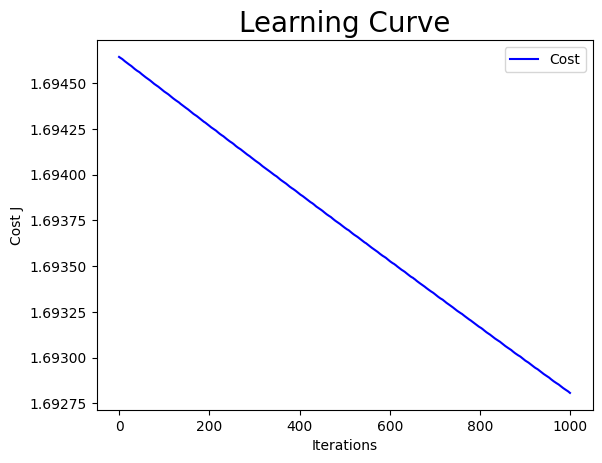

In [ ]:
plt.plot(np.arange(len(J_hist_5)), J_hist_5, 'b', label='Cost')
plt.title('Learning Curve', fontdict={'fontsize': 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.legend()
plt.show()

`Saved Progress`

In [ ]:
# df = pd.DataFrame(w1_fin)
# df.to_csv('/content/drive/MyDrive/w1.csv', index=False)
# df = pd.DataFrame(b1_fin)
# df.to_csv('/content/drive/MyDrive/b1.csv', index=False)
# df = pd.DataFrame(w2_fin)
# df.to_csv('/content/drive/MyDrive/w2.csv', index=False)
# df = pd.DataFrame(b2_fin)
# df.to_csv('/content/drive/MyDrive/b2.csv', index=False)
# df = pd.DataFrame(w3_fin)
# df.to_csv('/content/drive/MyDrive/w3.csv', index=False)
# df = pd.DataFrame(b3_fin)
# df.to_csv('/content/drive/MyDrive/b3.csv', index=False)
# df = pd.DataFrame(w4_fin)
# df.to_csv('/content/drive/MyDrive/w4.csv', index=False)
# df = pd.DataFrame(b4_fin)
# df.to_csv('/content/drive/MyDrive/b4.csv', index=False)

##**7. Gradient Descent of Second Batch**

`Reading Batch 2`

In [ ]:
df_batch2 = pd.read_csv('/content/drive/MyDrive/nn_train.csv', delimiter=',', skiprows=40000, nrows=40000)

df_train = df_batch2.iloc[:32000]
df_cv = df_batch2.iloc[32000:36000]
df_test = df_batch2.iloc[36000:]

features_batch2 = df_train.iloc[:, 1:1026]

x_train = features_batch2.to_numpy()
y_train = df_train.iloc[:, 1026].to_numpy()


x_train = (x_train - mean) / std                                 # same normalization

print(f"x_next_batch = {x_train}")
print(f"y_next_batch = {y_train}")

x_next_batch = [[-1.12550798 -1.23509799 -1.15811456 ... -0.40339487 -0.50898951
  -1.00231518]
 [ 1.44325431  1.45773809  1.41790319 ... -1.66234662 -1.54526688
  -1.00231518]
 [ 0.63510438  0.15522499  0.12253426 ...  0.20021213  0.47632341
   0.99769017]
 ...
 [ 0.05785443  0.2137649   0.4610966  ...  1.07975377  1.25777848
   0.99769017]
 [ 0.54851689  0.33084473  0.29917548 ...  1.01077011  1.00295618
  -1.00231518]
 [-0.63484552 -0.64969884 -0.67235121 ...  1.25221291  1.22380217
  -1.00231518]]
y_next_batch = [5 9 7 ... 5 1 3]


`Gradient Descent`

In [ ]:
y_train_encoded = np.eye(10)[y_train - 1]

In [ ]:
epochs = 2000
tmp_alpha = 0.01
tmp_lambda = 540

In [ ]:
%time
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist2 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                  tmp_alpha, tmp_lambda, epochs)



print(f"TRAIN COST estimated is ={J_hist2[-1] : 8.4f}")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs
Epoch      0/2000 : Cost   2.0826
Epoch    200/2000 : Cost   1.9354
Epoch    400/2000 : Cost   1.8810
Epoch    600/2000 : Cost   1.8465
Epoch    800/2000 : Cost   1.8214
Epoch   1000/2000 : Cost   1.8018
Epoch   1200/2000 : Cost   1.7858
Epoch   1400/2000 : Cost   1.7723
Epoch   1600/2000 : Cost   1.7606
Epoch   1800/2000 : Cost   1.7503
TRAIN COST estimated is =  1.7412


`Learning Curve`

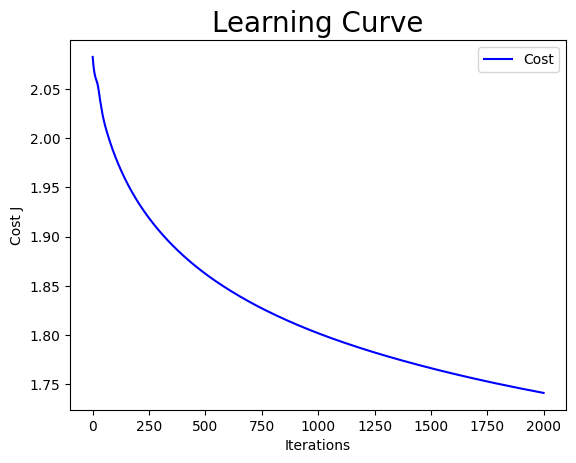

In [ ]:
plt.plot(np.arange(len(J_hist2)), J_hist2, 'b', label='Cost')
plt.title('Learning Curve', fontdict={'fontsize': 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.legend()
plt.show()

`Gradient Descent`

In [ ]:
epochs = 2000
tmp_alpha = 0.005
tmp_lambda = 580

In [ ]:
%time
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist2_1 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                  tmp_alpha, tmp_lambda, epochs)



print(f"TRAIN COST estimated is ={J_hist2_1[-1] : 8.4f}")

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
Epoch      0/2000 : Cost   1.7695
Epoch    200/2000 : Cost   1.7651
Epoch    400/2000 : Cost   1.7610
Epoch    600/2000 : Cost   1.7570
Epoch    800/2000 : Cost   1.7533
Epoch   1000/2000 : Cost   1.7498
Epoch   1200/2000 : Cost   1.7464
Epoch   1400/2000 : Cost   1.7431
Epoch   1600/2000 : Cost   1.7400
Epoch   1800/2000 : Cost   1.7371
TRAIN COST estimated is =  1.7342


`Learning Curve`

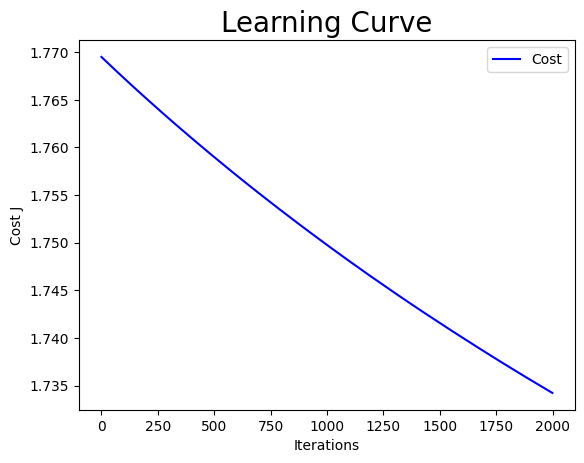

In [ ]:
plt.plot(np.arange(len(J_hist2_1)), J_hist2_1, 'b', label='Cost')
plt.title('Learning Curve', fontdict={'fontsize': 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.legend()
plt.show()

`Gradient Descent`

In [ ]:
epochs = 5000
tmp_alpha = 0.008
tmp_lambda = 640

In [ ]:
%time
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist2_2 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                  tmp_alpha, tmp_lambda, epochs)



print(f"TRAIN COST estimated is ={J_hist2_2[-1] : 8.4f}")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
Epoch      0/5000 : Cost   1.7110
Epoch    500/5000 : Cost   1.7049
Epoch   1000/5000 : Cost   1.7025
Epoch   1500/5000 : Cost   1.7004
Epoch   2000/5000 : Cost   1.6984
Epoch   2500/5000 : Cost   1.6968
Epoch   3000/5000 : Cost   1.6953
Epoch   3500/5000 : Cost   1.6938
Epoch   4000/5000 : Cost   1.6953
Epoch   4500/5000 : Cost   1.6919
TRAIN COST estimated is =  1.6894


`Learning Curve`

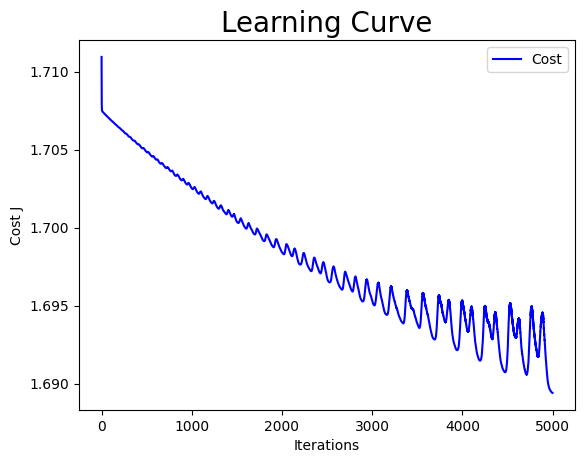

In [ ]:
plt.plot(np.arange(len(J_hist2_2)), J_hist2_2, 'b', label='Cost')
plt.title('Learning Curve', fontdict={'fontsize': 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.legend()
plt.show()

`Gradient Descent`

In [ ]:
epochs = 1000
tmp_alpha = 0.001
tmp_lambda = 640

In [ ]:
%time
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist2_3 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                  tmp_alpha, tmp_lambda, epochs)



print(f"TRAIN COST estimated is ={J_hist2_3[-1] : 8.4f}")

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 12.4 µs
Epoch      0/1000 : Cost   1.6894
Epoch    100/1000 : Cost   1.6893
Epoch    200/1000 : Cost   1.6892
Epoch    300/1000 : Cost   1.6892
Epoch    400/1000 : Cost   1.6892
Epoch    500/1000 : Cost   1.6891
Epoch    600/1000 : Cost   1.6891
Epoch    700/1000 : Cost   1.6891
Epoch    800/1000 : Cost   1.6890
Epoch    900/1000 : Cost   1.6890
TRAIN COST estimated is =  1.6890


`Learning Curve`

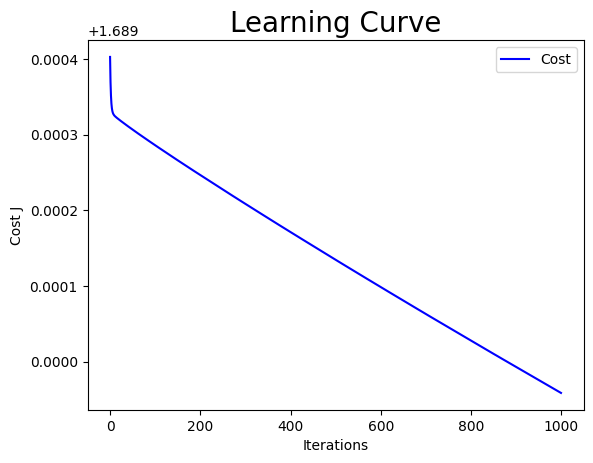

In [ ]:
plt.plot(np.arange(len(J_hist2_3)), J_hist2_3, 'b', label='Cost')
plt.title('Learning Curve', fontdict={'fontsize': 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.legend()
plt.show()

##**8. Learned Parameters**

In [ ]:
print(f'Obtained weights = {w1_fin}' )
print(f'{w2_fin}' )
print(f'{w3_fin}' )
print(f'{w4_fin}' )
print()
print(f'Obtained bias terms = {b1_fin}')
print(f'{b2_fin}')
print(f'{b3_fin}')
print(f'{b4_fin}')

Obtained weights = [[ 0.00209699  0.01297499 -0.00857375 ... -0.03152327 -0.00408675
   0.01326717]
 [ 0.00798481  0.01180252 -0.00642909 ... -0.01742261 -0.01326078
   0.01641808]
 [ 0.00710443  0.01453489 -0.00944511 ... -0.00855727 -0.00257325
   0.00359067]
 ...
 [ 0.00413851 -0.00638673 -0.00271727 ...  0.01377859 -0.00591986
   0.00212224]
 [-0.00013718 -0.00572622 -0.00061382 ... -0.00554189 -0.00954419
   0.00602892]
 [-0.01503575  0.00067946 -0.01246153 ... -0.06382319  0.02584041
   0.04359092]]
[[-0.05560078  0.21711338  0.11256667 ...  0.10912945  0.16153157
   0.00648252]
 [ 0.0618623   0.02228822 -0.03239762 ... -0.12109069 -0.03977543
  -0.00190695]
 [-0.06401697  0.18249834  0.13983108 ...  0.04498767  0.19756034
  -0.04088441]
 ...
 [ 0.0799771  -0.12701252 -0.10033733 ... -0.11648762 -0.13896466
   0.0171738 ]
 [ 0.06500996 -0.17847633 -0.07808769 ... -0.08829271 -0.11416355
   0.05163573]
 [-0.07175507  0.2231794   0.13041768 ...  0.12594196  0.15724257
   0.02407685

##**9. Estimating Cross Validation Cost**

`CV Set`




In [ ]:
features_cv = df_cv.iloc[:, 1:1026]

x_cv = features_cv.to_numpy()
y_cv = df_cv.iloc[:, 1026].to_numpy()


`Same Normalization`




In [ ]:
x_cv = (x_cv - mean) / std

print(f"x_cv = {x_cv}")
print(f"y_cv = {y_cv}")

x_cv = [[ 0.69282937  0.71135418  0.72605843 ...  0.64860591  0.54427603
   0.99769017]
 [ 0.50522314  0.60890933  0.65245792 ...  1.42467205  1.22380217
   0.99769017]
 [-0.43280803 -0.41553918 -0.08354716 ... -0.45513262 -0.42404874
   0.99769017]
 ...
 [ 1.80403554  1.7943426   1.69758512 ... -1.14496919 -1.22249196
  -1.00231518]
 [ 1.48654806  1.51627801  1.57982431 ...  1.45916388  1.29175479
   0.99769017]
 [-1.26982047 -1.29363791 -1.32003568 ...  1.21772108  1.03693248
  -1.00231518]]
y_cv = [ 6  8  6 ... 10  8  6]


In [ ]:
m_cv = x_cv.shape[0]
print(m_cv)

4000


`Computing Cross Validation Cost`

In [ ]:
cv_lambda = 0

y_cv_encoded = np.eye(10)[y_cv - 1]

a1_cv, a2_cv, a3_cv, a4_cv, z1, z2, z3, z4 = forward_prop(x_cv, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin)
cv_cost = cost(y_cv_encoded, a4_cv, w1_fin, w2_fin, w3_fin, w4_fin, cv_lambda)

print(f"CROSS VALIDATION COST estimated is ={cv_cost : 8.4f}")

CROSS VALIDATION COST estimated is =  1.5192


##**10. Estimating Test Cost**

`Test Set`

In [ ]:
features_test = df_test.iloc[:, 1:1026]

x_test = features_test.to_numpy()
y_test = df_test.iloc[:, 1026].to_numpy()

`Same Normalization`

In [ ]:
x_test = (x_test - mean) / std

print(f"x_test = {x_test}")
print(f"y_test = {y_test}")

x_test = [[-8.08020505e-01 -9.42398417e-01 -6.57631113e-01 ... -1.85205168e+00
  -1.68117211e+00  9.97690168e-01]
 [ 5.62948135e-01  6.08909328e-01  6.52457918e-01 ...  2.86441704e-01
   2.55477412e-01  9.97690168e-01]
 [ 6.92829375e-01  5.21099455e-01 -3.93868515e-02 ...  4.49989021e-02
   3.46314131e-02 -1.00231518e+00]
 ...
 [-1.54401420e+00 -1.13265314e+00 -1.02563365e+00 ... -1.74857619e+00
  -1.46032612e+00 -1.00231518e+00]
 [ 1.29430263e-04  9.30878860e-01  1.41790319e+00 ... -9.72510047e-01
  -5.59953967e-01 -1.00231518e+00]
 [-4.31643163e-02 -6.42996937e-02 -5.41069530e-02 ...  1.82966217e-01
   6.12228640e-01  9.97690168e-01]]
y_test = [ 2  9  4 ...  2 10  1]


In [ ]:
m_test = x_test.shape[0]
print(m_test)

4000


`Computing Test Cost`

In [ ]:
test_lambda = 0

y_test_encoded = np.eye(10)[y_test - 1]

a1_test, a2_test, a3_test, a4_test, z1, z2, z3, z4 = forward_prop(x_test, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin)
test_cost = cost(y_test_encoded, a4_test, w1_fin, w2_fin, w3_fin, w4_fin, test_lambda)

print(f"TEST COST estimated is ={test_cost : 8.4f}")

TEST COST estimated is =  1.4889


##**11. Estimating Accuracy**

`Defining Threshold using CV set`

In [ ]:
y_cv_pred = np.argmax(a4_cv, axis=1) + 1

accuracy = np.mean(y_cv_pred == y_cv)
print(f"Cross-validation accuracy: {accuracy * 100}%")

Cross-validation accuracy: 46.800000000000004%


`Accuracy of Test Set Predictions`

In [ ]:
y_test_pred = np.argmax(a4_test, axis=1) + 1

accuracy = np.mean(y_test_pred == y_test)
print(f"Test accuracy: {accuracy * 100}%")

Test accuracy: 47.075%


`Accuracy of Train Set Predictions`

In [ ]:
a1, a2, a3, a4, z1, z2, z3, z4 = forward_prop(x_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin)

y_train_pred = np.argmax(a4, axis=1) + 1

accuracy = np.mean(y_train_pred == y_train)
print(f"Train accuracy: {accuracy * 100}%")

Train accuracy: 57.10625%


##**12. F1 Score**

`Defining Precision - Recall`

In [ ]:
def precision_recall_multiclass(y_true, y_pred, num_classes):
    precision_per_class = []
    recall_per_class = []
    for i in range(num_classes):
        TP = np.sum((y_true == i + 1) & (y_pred == i + 1))
        FP = np.sum((y_true != i + 1) & (y_pred == i + 1))
        FN = np.sum((y_true == i + 1) & (y_pred != i + 1))
        precision = TP / (TP + FP) if (TP + FP) != 0 else 0.0
        recall = TP / (TP + FN) if (TP + FN) != 0 else 0.0
        precision_per_class.append(precision)
        recall_per_class.append(recall)
    return precision_per_class, recall_per_class

`Precision Recall for CV Set`

In [ ]:
precision_cv, recall_cv = precision_recall_multiclass(y_cv, y_cv_pred, 10)

print("Precision for each class (CV):", precision_cv)
print("Recall for each class (CV):", recall_cv)

macro_precision_cv = np.mean(precision_cv)
macro_recall_cv = np.mean(recall_cv)

print(f"Macro-average Precision (CV): {macro_precision_cv}")
print(f"Macro-average Recall (CV): {macro_recall_cv}")

Precision for each class (CV): [0.4888888888888889, 0.5763688760806917, 0.38444924406047515, 0.4005524861878453, 0.4854368932038835, 0.4141791044776119, 0.47093023255813954, 0.46766169154228854, 0.4973544973544973, 0.49440715883668906]
Recall for each class (CV): [0.4841075794621027, 0.5405405405405406, 0.4405940594059406, 0.337995337995338, 0.49261083743842365, 0.2674698795180723, 0.597051597051597, 0.5108695652173914, 0.48578811369509045, 0.5456790123456791]
Macro-average Precision (CV): 0.4680229073191011
Macro-average Recall (CV): 0.4702706522670176


`F1 Score`

In [ ]:
F1 = 2 * (macro_precision_cv * macro_recall_cv) / (macro_precision_cv + macro_recall_cv)

print(f"F1 Score = {F1 : 8.4f}")

F1 Score =   0.4691


## **13. Prediction For Test Set**

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/nn_test.csv', delimiter = ',')        # reading test set
df_test = df_test.drop(columns = ['ID'])
print(df_test.shape)

(20000, 1024)


In [ ]:
df_ = pd.read_csv('/content/drive/MyDrive/Predictions/nn_binary_test_prediction.csv', delimiter = ',')        # reading binary labels
print(df_.shape)

(20000, 1)


`Test Set`

In [ ]:
features_test = df_test.loc[:, 'Feature_1':'Feature_1024']
x_ = features_test.to_numpy()
x__ = df_.to_numpy()

x_test = np.append(x_, x__, axis = 1)

print(f"x_test = {x_test}")

x_test = [[ 52  36  23 ...  32  30   1]
 [118 119 120 ...  52  52   0]
 [162 166 171 ...  42  43   0]
 ...
 [255 255 254 ...  65  70   1]
 [ 81  95  95 ... 130 132   0]
 [172 212 160 ... 178 186   1]]


`Same Normalization`

In [ ]:
x_test = (x_test - mean) / std

print(f'x_test = {x_test}')

x_test = [[-0.9234705  -1.17655808 -1.39363619 ... -1.35192016 -1.35839719
   0.99769017]
 [ 0.02899193  0.03814516  0.03421366 ... -1.00700188 -0.98465781
  -1.00231518]
 [ 0.66396688  0.72598916  0.78493883 ... -1.17946102 -1.13755119
  -1.00231518]
 ...
 [ 2.00607302  2.02850226  2.00670725 ... -0.78280499 -0.67887104
   0.99769017]
 [-0.50496428 -0.31309433 -0.33378888 ...  0.33817945  0.37439449
  -1.00231518]
 [ 0.80827937  1.39919818  0.62301771 ...  1.16598334  1.29175479
   0.99769017]]


`Prediction for Test Set`

In [ ]:
a1_test, a2_test, a3_test, a4_test, z1, z2, z3, z4 = forward_prop(x_test, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin)
y_test_pred = np.argmax(a4_test, axis=1) + 1

print(f"y_test_pred = {y_test_pred}")

y_test_pred = [7 1 9 ... 9 3 7]


`Saved the prediction in Google Drive`

In [ ]:
# df = pd.DataFrame(y_test_pred)
# df.columns = ['Prediction_nn_multiclassification']
# df.to_csv('/content/drive/MyDrive/nn_binary+class_test_prediction.csv', index=False)